In [1]:
pip install fdtd


Note: you may need to restart the kernel to use updated packages.


In [2]:
import fdtd
import torch
import numpy as np

In [21]:
fdtd.set_backend("torch")

In [54]:
grid=fdtd.Grid(
    shape=(100,300,1),
    grid_spacing= 1,
    permittivity= 1.0,
    permeability= 1.0,
    #courant_number: float = None,
)

In [55]:
grid.reset

<bound method Grid.reset of Grid(shape=(100,300,1), grid_spacing=1.00e+00, courant_number=0.70)>

In [56]:
p_mat=torch.ones(100,50,1)*1.5
p_mat2=torch.ones(10,10)*1.2
#p_mat=p_mat.reshape(10,10,1)
#p_mat2=p_mat2.reshape(10,10,1)
print(p_mat.size())

torch.Size([100, 50, 1])


In [57]:
grid[0:100, 75:125, 0] = fdtd.Object(permittivity=p_mat, name="object1")
#grid[30:40, 30:40, 0] = fdtd.Object(permittivity=p_mat2,name="object2")

In [58]:
grid[50, 50, 0]=fdtd.PointSource( name="object4")

In [59]:
grid[70,70,0]=fdtd.CurrentDetector(name="detector1")

In [60]:
grid[70:70,170:180,0]=fdtd.LineDetector(name="detector2")

In [22]:
video=grid.generate_video
grid.save_data?

In [61]:
# x boundaries
grid[0:10, :, :] = fdtd.PML(name="pml_xlow")
grid[-10:, :, :] = fdtd.PML(name="pml_xhigh")

# y boundaries
grid[:, 0:10, :] = fdtd.PML(name="pml_ylow")
grid[:, -10:, :] = fdtd.PML(name="pml_yhigh")

In [66]:
grid.run(total_time=100)

100%|██████████| 100/100 [00:00<00:00, 231.97it/s]


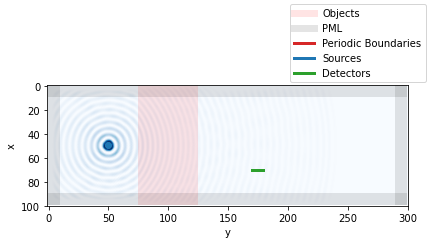

In [67]:
grid.visualize(z=0)

In [15]:
out1=grid.detector1.detector_values()
print(type(out1["I"]))
print(len(out1["I"]))
print(type(out1["I"][1]))
detector_out=torch.tensor(out1["I"])
t1=torch.zeros(100)
detector_out=detector_out.reshape_as(t1)
print(detector_out.size())
print(detector_out**2)

<class 'list'>
200
<class 'list'>


RuntimeError: shape '[100]' is invalid for input of size 200

In [95]:
grid.detector2.detector_values()

{'E': [tensor([[0., 0., 0.]]),
  tensor([[0., 0., 0.]]),
  tensor([[0., 0., 0.]]),
  tensor([[0., 0., 0.]]),
  tensor([[0., 0., 0.]]),
  tensor([[0., 0., 0.]]),
  tensor([[0., 0., 0.]]),
  tensor([[0., 0., 0.]]),
  tensor([[0., 0., 0.]]),
  tensor([[0., 0., 0.]]),
  tensor([[0., 0., 0.]]),
  tensor([[0., 0., 0.]]),
  tensor([[0., 0., 0.]]),
  tensor([[0., 0., 0.]]),
  tensor([[0., 0., 0.]]),
  tensor([[0., 0., 0.]]),
  tensor([[0., 0., 0.]]),
  tensor([[0., 0., 0.]]),
  tensor([[0., 0., 0.]]),
  tensor([[0., 0., 0.]]),
  tensor([[0., 0., 0.]]),
  tensor([[0., 0., 0.]]),
  tensor([[0., 0., 0.]]),
  tensor([[0., 0., 0.]]),
  tensor([[0., 0., 0.]]),
  tensor([[0., 0., 0.]]),
  tensor([[0., 0., 0.]]),
  tensor([[0., 0., 0.]]),
  tensor([[0., 0., 0.]]),
  tensor([[0., 0., 0.]]),
  tensor([[0., 0., 0.]]),
  tensor([[0., 0., 0.]]),
  tensor([[0., 0., 0.]]),
  tensor([[0., 0., 0.]]),
  tensor([[0., 0., 0.]]),
  tensor([[0., 0., 0.]]),
  tensor([[0., 0., 0.]]),
  tensor([[0., 0., 0.]]),
  tenso

In [ ]:
grid[70:71,70:71,0]=fdtd.LineDetector(name="detector2")

In [176]:
data = np.load('detector_readings.npz')


In [ ]:
grid.

In [12]:
grid.update_H()
print(grid)

Grid(shape=(100,100,1), grid_spacing=1.00e+00, courant_number=0.70)

sources:
    PointSource(period=15, amplitude=1.0, phase_shift=0.0, name='object4')
        @ x=50, y=50, z=0

detectors:
    LineDetector(name='detector')
        @ x=[0, ... , 0], y=[0, ... , 99], z=[0, ... , 0]

objects:
    Object(name='object1')
        @ x=60:70, y=60:70, z=0:1
    Object(name='object2')
        @ x=30:40, y=30:40, z=0:1



In [ ]:
def curl_E(E):
    curl_E = np.zeros(E.shape)
    curl_E[:,:-1,:,0] += E[:,1:,:,2] - E[:,:-1,:,2]
    curl_E[:,:,:-1,0] -= E[:,:,1:,1] - E[:,:,:-1,1]

    curl_E[:,:,:-1,1] += E[:,:,1:,0] - E[:,:,:-1,0]
    curl_E[:-1,:,:,1] -= E[1:,:,:,2] - E[:-1,:,:,2]

    curl_E[:-1,:,:,2] += E[1:,:,:,1] - E[:-1,:,:,1]
    curl_E[:,:-1,:,2] -= E[:,1:,:,0] - E[:,:-1,:,0]
    return curl_E

In [ ]:
def curl_H(H):
    curl_H = np.zeros(H.shape)

    curl_H[:,1:,:,0] += H[:,1:,:,2] - H[:,:-1,:,2]
    curl_H[:,:,1:,0] -= H[:,:,1:,1] - H[:,:,:-1,1]

    curl_H[:,:,1:,1] += H[:,:,1:,0] - H[:,:,:-1,0]
    curl_H[1:,:,:,1] -= H[1:,:,:,2] - H[:-1,:,:,2]

    curl_H[1:,:,:,2] += H[1:,:,:,1] - H[:-1,:,:,1]
    curl_H[:,1:,:,2] -= H[:,1:,:,0] - H[:,:-1,:,0]
    return curl_H

In [ ]:
    E  += (c*dt/du)*inv(ε)*curl_H
    H  -= (c*dt/du)*inv(µ)*curl_E

In [ ]:
class Grid:
    # ... [initialization]

    def step(self):
        self.update_E()
        self.update_H()

    def update_E(self):
        self.E += self.courant_number * self.inverse_permittivity * curl_H(self.H)

    def update_H(self):
        self.H -= self.courant_number * self.inverse_permeability * curl_E(self.E)